In [393]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import FormatStrFormatter

sns.set_theme()
save_fig = True

In [394]:
def load_optims(zad_id):
    optimums = pd.read_csv(f'../Results/zad_{zad_id}_optims.csv', sep=';')
    return optimums

In [370]:
def plot_metrics_boxplot(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(1, len(problem_names), figsize=(18, 4))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            data_to_plot = []
            models = []
            for gr_id, (group_name, group) in enumerate(groupby):
                genes_groups = group.sort_values(['genes']).groupby('genes')
                x = list(genes_groups.genes.groups.keys())#.tolist()
                y = genes_groups[metric].median().tolist()
                # print(x, y)
                model_name = model_names[group_name]
                ax[index].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                ax[index].set_title(problem_name)
                ax[index].legend()
                
                ax[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                ax[index].set_xlabel('Liczba genów')
                #ax[index].set_ylabel(f'Mediana {metric}')
                
                
            ax[index].boxplot(data_to_plot)
            ax[index].set_title(problem_name)
            ax[index].legend()
            ax[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            print(models)
            ax[index].set_xticks(np.arange(1, len(models) + 1, 1), models)
            ax[index].set_xlabel('Metoda')
            
#                 if metric == 'bestValue':
#                     optimums = load_optims(zad_id)
#                     opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
#                     groupby = opts.sort_values(['genes']).groupby(['genes']).median()
#                     opts = groupby.maxVal

                    # ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Plots/lab4zad1_{metric}.jpg')
        else:
            print(metric)
            plt.show()

## LAB4ZAD1

In [321]:
def plot_metrics_4_1_line(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            x_ticks = []
            data_to_plot = []
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                x_ticks.append(x[0])
                y = param_groups[metric].median().tolist()
                #model_name = model_names[group_name]
                x = gr_id
                data_to_plot.append(y)
                
            ax[index//3, index%3].plot(x_ticks, data_to_plot, 'o-', linewidth=2, markersize=7)
            ax[index//3, index%3].set_title(problem_name)
            #ax[index].legend()

            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax[index//3, index%3].set_xticks(x_ticks, rotation = 60)
            #ax[index].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xlabel('Rozmiar populacji')
            ax[index//3, index%3].set_ylabel(f'Mediana {metric}')
            
            if metric == 'bestValue':
                optimums = load_optims(zad_id)
                opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                opts = groupby.maxVal

                ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')
                #ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Results/Plots/lab4zad1_{metric}.jpg')
        else:
            print(metric)
            plt.show()

In [322]:
def plot_metrics_4_1(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            x_ticks = []
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                x_ticks.append(x[0])
                
                y = param_groups[metric].median().tolist()
                #model_name = model_names[group_name]
                ax[index//3, index%3].plot(x, y, f'{markers[gr_id]}-', linewidth=2, markersize=7)
            ax[index//3, index%3].set_title(problem_name)
            #ax[index].legend()

            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax[index//3, index%3].set_xticks(x_ticks, rotation = 60)
            #ax[index].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xlabel('Rozmiar populacji')
            ax[index//3, index%3].set_ylabel(f'Mediana {metric}')
            
            if metric == 'bestValue':
                optimums = load_optims(zad_id)
                opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                opts = groupby.maxVal

                ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')
                #ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Results/Plots/lab4zad1_{metric}.jpg')
        else:
            print(metric)
            plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Results/zad_41_Max3SAT.csv'

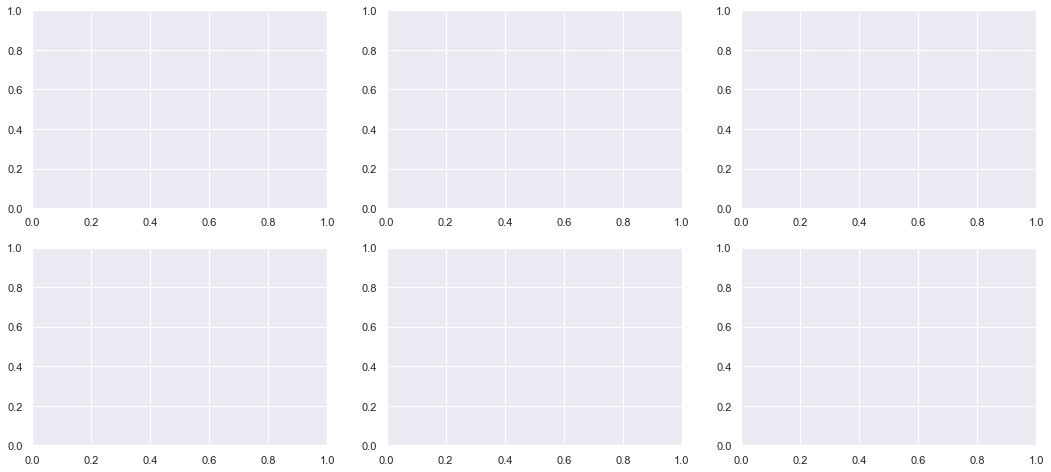

In [323]:
problem_names = {'Max3SAT': 'Max3SAT', 
                 'ISG': 'ISG',
                 'NKLandscapes': 'NK-land',
                 'Concatenation_10': 'Concatenation_10',
                 'Concatenation_50': 'Concatenation_50',
                 'Concatenation_100': 'Concatenation_100',
                }


model_names = {
    10: 10,
    50: 50,
    100: 100,
    200: 200,
    500: 500,
    1000: 1000,
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']


#plot_metrics_4_1(41, problem_names, model_names, metrics)
plot_metrics_4_1_line(41, problem_names, model_names, metrics)


## LAB 4 ZAD 2

In [402]:
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

def plot_metrics_4_2(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['param1', 'param2'])
            results = np.zeros(shape=(11, 11))
            
            for gr_id, ((crossProb, mutProb), group) in enumerate(groupby):
                param_groups = group.sort_values(['param1', 'param2']).groupby(['param1', 'param2'])
                x = crossProb
                y = mutProb
                results[int(10*x), int(10*y)] = round(param_groups[metric].median().tolist()[0], 2)
            labels = np.arange(0, 1.1, 0.1).tolist()
            labels = [round(x, 1) for x in labels]
            results = pd.DataFrame(results, index = labels, columns = labels)

            g = sns.heatmap(results, annot=True, annot_kws={"fontsize": 11}, fmt='g', cmap="YlOrBr_r", ax=ax[index//3, index%3])
            
            column_max = results.idxmax(axis=0)
            best_res = -123456 #15235235
            BESTS = []
            for col, variable in enumerate(labels):
                position = results.index.get_loc(column_max[variable])
                if best_res < results.iloc[position, col]:
                    best_ids = (col, position)
                    best_res =  results.iloc[position, col]
                    BESTS = []
                    BESTS.append(best_ids)
                elif best_res == results.iloc[position, col]:
                    BESTS.append(best_ids)
            
            for best_ids in BESTS:
                ax[index//3, index%3].add_patch(Rectangle(best_ids, 1, 1, fill=False, edgecolor='red', lw=3))
            ax[index//3, index%3].set_xlabel('Prawdopodobienstwo mutacji')
            ax[index//3, index%3].set_ylabel('Prawdopodobienstwo krzyzowania')


        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Results/Plots/lab4zad2_{metric}_correct.jpg')
        else:
            print(metric)
            plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Results/zad_42_Max3SAT.csv'

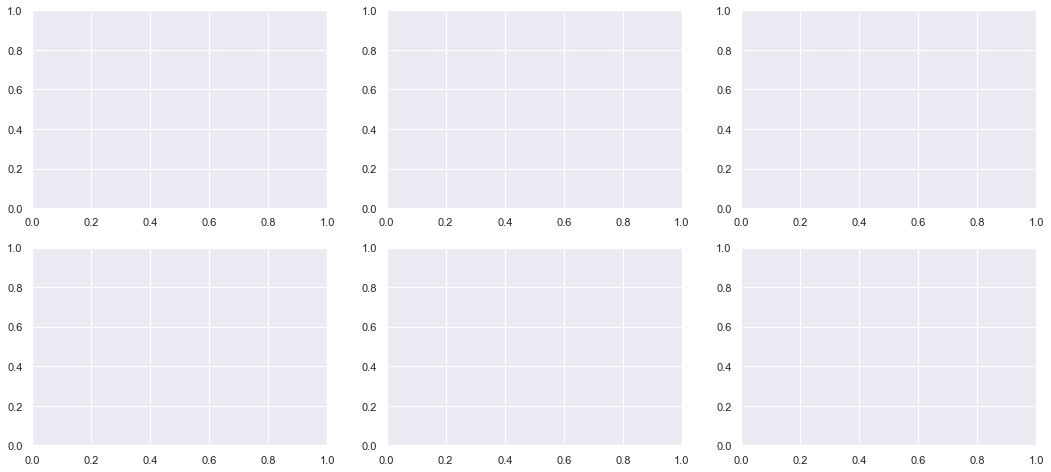

In [403]:
problem_names = {'Max3SAT': 'Max3SAT', 
                 'ISG': 'ISG',
                 'NKLandscapes': 'NK-land',
                 'Concatenation_10': 'Concatenation_10',
                 'Concatenation_50': 'Concatenation_50',
                 'Concatenation_100': 'Concatenation_100',
                }


model_names = {
    10: 10,
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics_4_2(42, problem_names, model_names, metrics)

## LAB 5 ZAD 1 i 2

In [385]:
def plot_metrics_boxplot(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))
            df.param1 = 1
            df.param2 = 1
            groupby = df.groupby(['method'])
            
            data_to_plot = []
            models = []
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                y = param_groups[metric].median().tolist()
                #print(x, y)
                model_name = model_names[group_name]
                
                x = gr_id
                data_to_plot.append(param_groups[metric].apply(list).iloc[0])
                models.append(model_name)
                #ax[index//3, index%3].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                #ax[index//3, index%3].set_title(problem_name)
                #ax[index//3, index%3].legend()
                
                #ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                
                #ax[index].set_ylabel(f'Mediana {metric}')
                
            ax[index//3, index%3].boxplot(data_to_plot, medianprops = dict(linewidth=6))
            ax[index//3, index%3].set_title(problem_name)
            ax[index//3, index%3].legend()
            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax[index//3, index%3].set_xticks(np.arange(1, len(models) + 1, 1), models)
            ax[index//3, index%3].set_xlabel('Metoda')
            ax[index//3, index%3].set_ylabel(metric)
            
            if metric == 'bestValue':
                optimums = load_optims(zad_id)
                opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                opts = groupby.maxVal

                ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Results/Plots/lab5zad1_{metric}.jpg')
        else:
            print(metric)
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

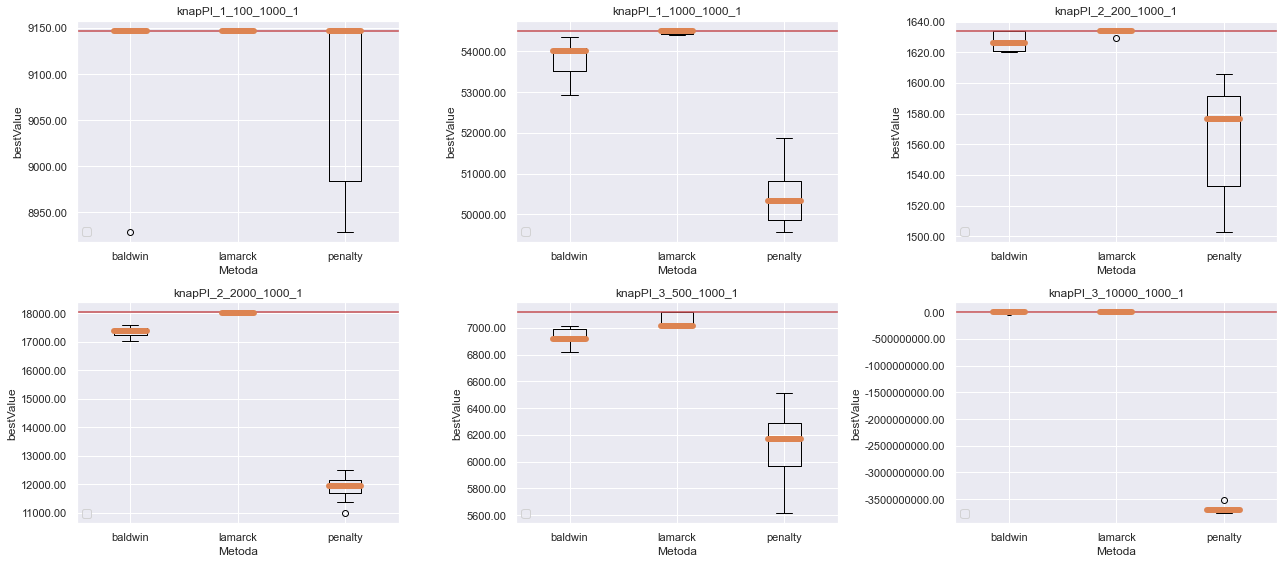

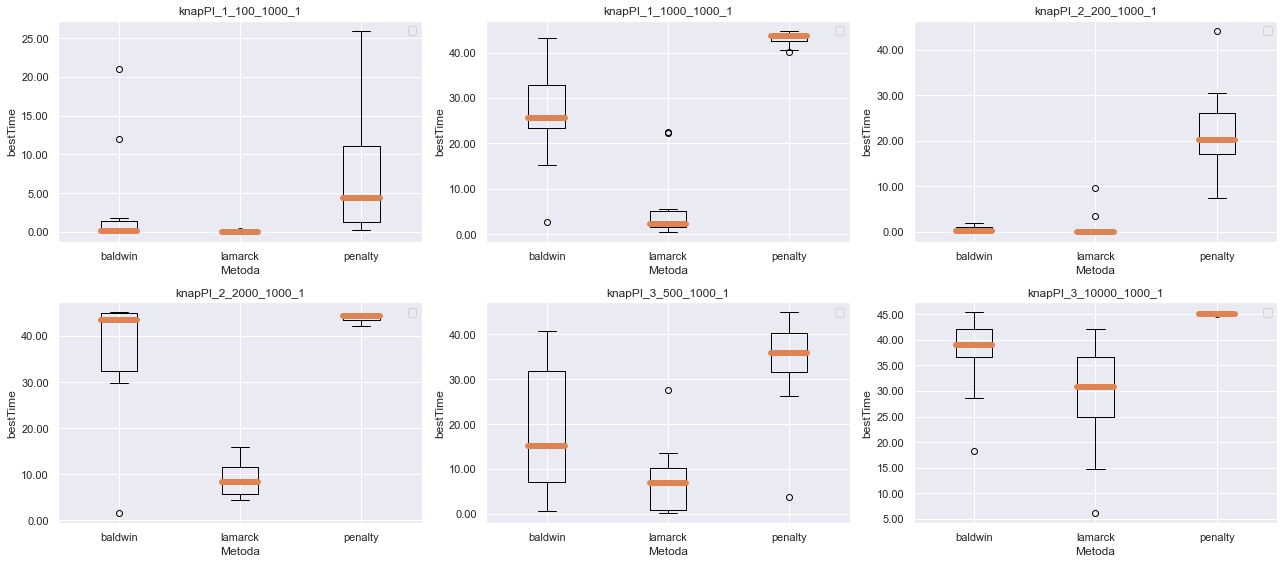

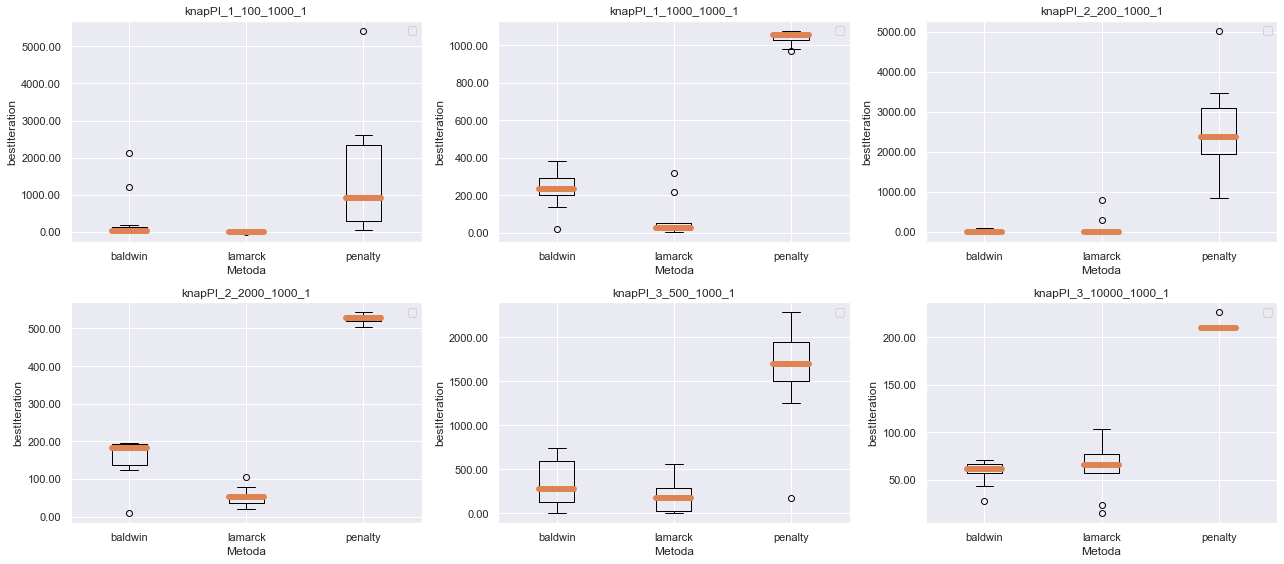

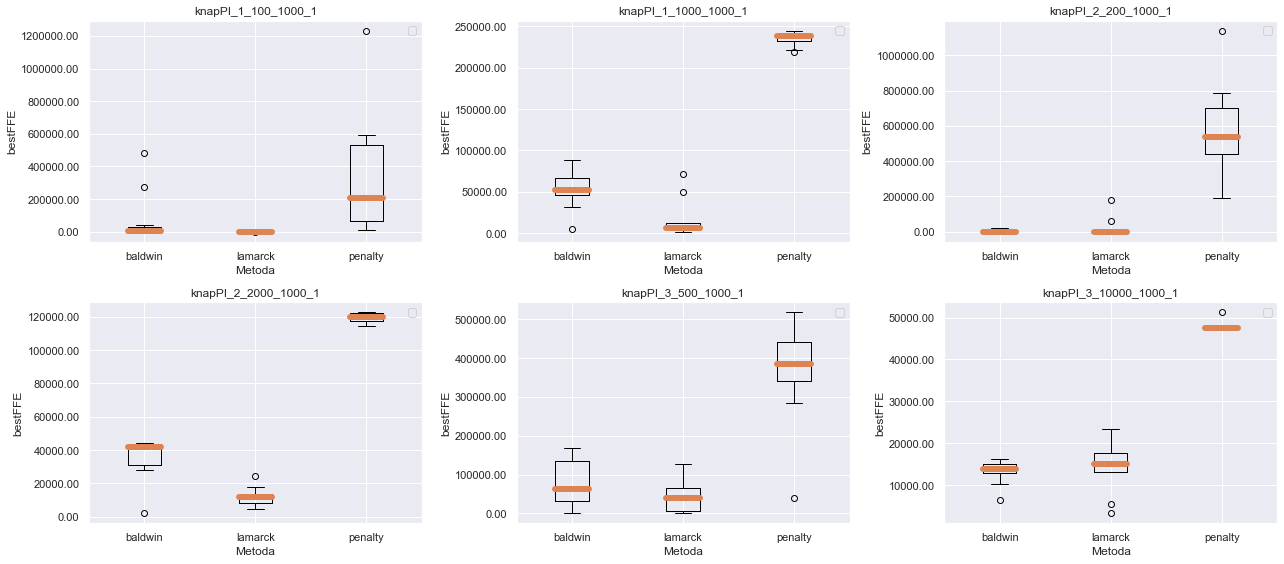

In [386]:
problem_names = {'knapPI_1_100_1000_1': 'knapPI_1_100_1000_1', 
                 'knapPI_1_1000_1000_1': 'knapPI_1_1000_1000_1',
                 'knapPI_2_200_1000_1': 'knapPI_2_200_1000_1',
                 'knapPI_2_2000_1000_1': 'knapPI_2_2000_1000_1',
                 'knapPI_3_500_1000_1': 'knapPI_3_500_1000_1',
                 'knapPI_3_5000_1000_1': 'knapPI_3_10000_1000_1',
                 }
# problem_names = {'knapPI_1_100_1000_1': 'knapPI_1_100_1000_1', 
#                  'knapPI_1_1000_1000_1': 'knapPI_1_1000_1000_1',
#                  'knapPI_2_200_1000_1': 'knapPI_2_200_1000_1',
#                  'knapPI_3_100_1000_1': 'knapPI_3_100_1000_1',
#                  'knapPI_3_500_1000_1': 'knapPI_3_500_1000_1'
#                 }

# problem_names = {'knapPI_1_100_1000_1': 'knapPI_1_100_1000_1', 
#                  'knapPI_2_200_1000_1': 'knapPI_2_200_1000_1',
#                  'knapPI_3_500_1000_1': 'knapPI_3_500_1000_1'
#                 }

model_names = {
    'penalty': 'penalty',
    'lamarck': 'lamarck',
    'baldwin': 'baldwin',
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics_boxplot(5, problem_names, model_names, metrics)


## Lab 6 Zad 1/3

In [522]:
fragment = [218,308
,3303
,16
,569
,1136]

def plot_metrics_6_3_line(zad_id, problem_names, model_names, metrics):
    for model_nr in range(len(model_names)):
        modelo = list(model_names.keys())[model_nr]
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')

            groupby = df.loc[df.method == modelo].groupby(['method'])
            x_ticks = []
            best = []
            worst = []
            mean = []

            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['iteration']).groupby('iteration')
                x = list(param_groups['iteration'].groups.keys())#.tolist()
                x_ticks = x[:fragment[index]]
                best = param_groups['best'].median().tolist()[:fragment[index]]
                worst = param_groups['worst'].median().tolist()[:fragment[index]]
                mean = param_groups['mean'].median().tolist()[:fragment[index]]

            if (len(x_ticks) != len(mean)):
                ax[index//3, index%3].plot(range(0, len(mean)), mean, 'o-', linewidth=2, markersize=2, label='avg', color='b')
                ax[index//3, index%3].plot(range(0, len(best)), best, 'o-', linewidth=2, markersize=2, label='best', color='g')
                ax[index//3, index%3].plot(range(0, len(worst)), worst, 'o-', linewidth=2, markersize=2, label='worst', color='r')
            else:
                ax[index//3, index%3].plot(x_ticks, mean, 'o-', linewidth=2, markersize=2, label='avg', color='b')
                ax[index//3, index%3].plot(x_ticks, best, 'o-', linewidth=2, markersize=2, label='best', color='g')
                ax[index//3, index%3].plot(x_ticks, worst, 'o-', linewidth=2, markersize=2, label='worst', color='r')
            ax[index//3, index%3].set_title(problem_name)
            #ax[index].legend()

            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            if (len(x_ticks) != len(mean)):
                    ax[index//3, index%3].set_xticks([xd for xd in range(0, len(mean)) if xd % (len(mean) // 7) == 0], rotation = 60)
            else:
                 ax[index//3, index%3].set_xticks([xd for xd in x_ticks if xd % (len(x_ticks) // 7) == 0], rotation = 60)
            #ax[index].set_xticklabels(x_ticks, rotation = 45)
            #ax[index//3, index%3].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xlabel('Nr iteracji')
            ax[index//3, index%3].set_ylabel(f'Mediana BestValue')
            ax[index//3, index%3].legend()
            
            print(len(mean))

        fig.tight_layout()
        
        plt.show()

    #         optimums = load_optims(zad_id)
    #         opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
    #         groupby = opts.sort_values(['genes']).groupby(['genes']).median()
    #         opts = groupby.maxVal

            # ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')
            #ax[index].scatter(x, opts, marker='x', s=200)

    # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
    
#     if save_fig:
#         plt.savefig(f'../Results/Plots/lab6zad3_utykanie.jpg')
#     else:
#         #print(metric)
#         plt.show()

218
308
3303
16
569
1136


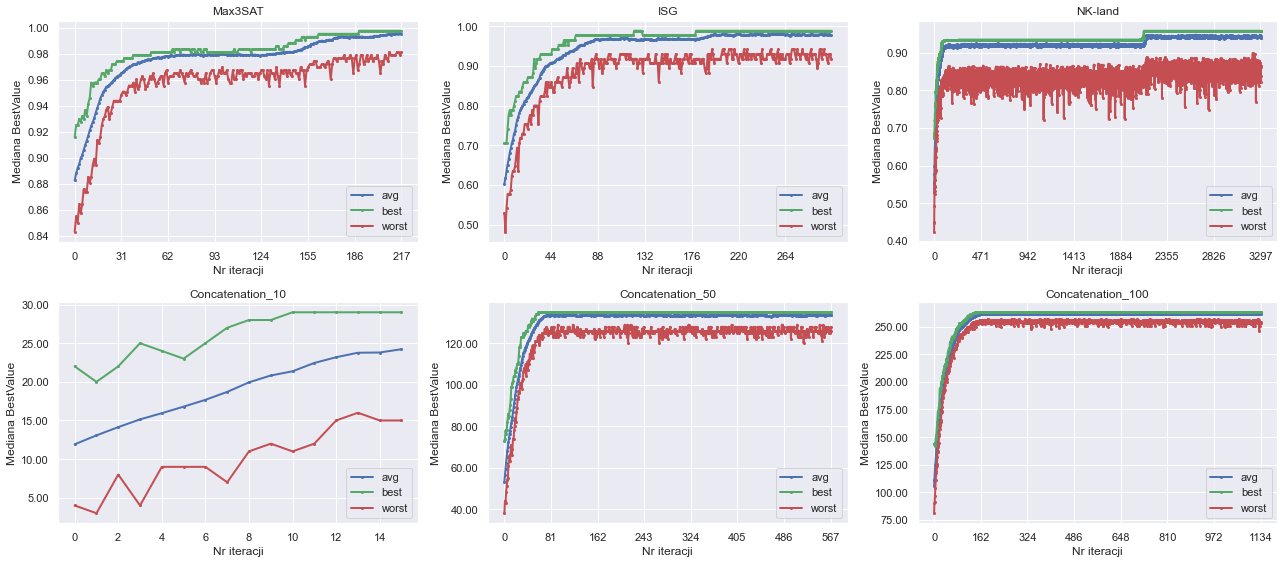

In [523]:
problem_names = {'CBinaryMax3SatEvaluation_100_utykanie': 'Max3SAT', 
                 'CBinaryIsingSpinGlassEvaluation_100_utykanie': 'ISG',
                 'CBinaryNKLandscapesEvaluation_100_utykanie': 'NK-land',
                 'CBinaryStandardDeceptiveConcatenationEvaluation_30_utykanie': 'Concatenation_10',
                 'CBinaryStandardDeceptiveConcatenationEvaluation_150_utykanie': 'Concatenation_50',
                 'CBinaryStandardDeceptiveConcatenationEvaluation_300_utykanie': 'Concatenation_100',
                }


model_names = {
    'lab6zad3_default': 'lab6zad3_default'
#     'island_20_5': 'island_20_5',
#     'island_20_15': 'island_20_15',
#     'island_4_15': 'island_4_15',
#     'island_4_5': 'island_4_5',
#     'lab6zad3_10pop': 'lab6zad3_10pop',
#     'lab6zad3_20pop': 'lab6zad3_20pop',
#     'lab6zad3_default': 'lab6zad3_default',
#     'lab6zad3_epictournament': 'lab6zad3_epictournament',
#     'lab6zad3_moreepictournament': 'lab6zad3_moreepictournament',
#     'lab6zad3_no_crossover': 'lab6zad3_no_crossover',
#     'lab6zad3_no_mutation': 'lab6zad3_no_mutation',
#     'lab6zad3_no_mutation_low_population': 'lab6zad3_no_mutation_low_population'
}

metrics = ['best', 'worst', 'mean']


#plot_metrics_4_1(41, problem_names, model_names, metrics)
plot_metrics_6_3_line(63, problem_names, model_names, metrics)


## Lab 6 Zad 3

In [404]:
def plot_metrics_boxplot(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))
            df.param1 = 1
            df.param2 = 1
            groupby = df.groupby(['method'])
            
            data_to_plot = []
            models = []
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                y = param_groups[metric].median().tolist()
                #print(x, y)
                model_name = model_names[group_name]
                
                x = gr_id
                data_to_plot.append(param_groups[metric].apply(list).iloc[0])
                models.append(model_name)
                #ax[index//3, index%3].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                #ax[index//3, index%3].set_title(problem_name)
                #ax[index//3, index%3].legend()
                
                #ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                #ax[index//3, index%3].set_xlabel('Liczba genów')
                #ax[index].set_ylabel(f'Me|diana {metric}')
                
                
            ax[index//3, index%3].boxplot(data_to_plot)
            ax[index//3, index%3].set_title(problem_name)
            ax[index//3, index%3].legend()
            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax[index//3, index%3].set_xticks(np.arange(1, len(models) + 1, 1), models)
            ax[index//3, index%3].set_xlabel('Metoda')
            
            if metric == 'bestValue':
                optimums = load_optims(zad_id)
                opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                opts = groupby.maxVal

                ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Plots/zad_{zad_id}_{problem_k}_{metric}.jpg')
        else:
            print(metric)
            plt.show()

KeyError: 'island_N20_M5'

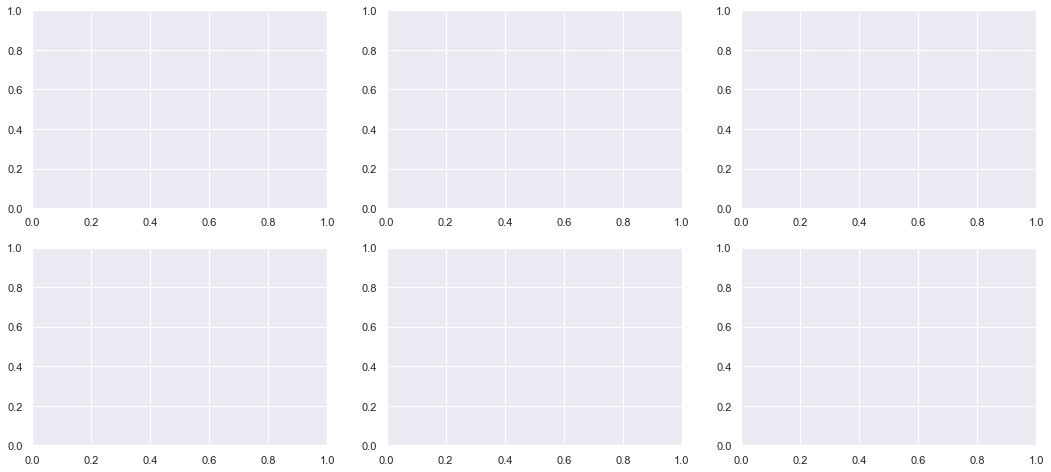

In [405]:
problem_names = {'Max3SAT': 'Max3SAT', 
                 'ISG': 'ISG',
                 'NKLandscapes': 'NK-land',
                 'Concatenation_10': 'Concatenation_10',
                 'Concatenation_50': 'Concatenation_50',
                 'Concatenation_100': 'Concatenation_100',
                }

model_names = {
    'lab6zad3': 'default', 
    'island_N1_M1000': 'island_N1_M1000',
    'island_N2_M50': 'island_N2_M50',
    'island_N4_M15': 'island_N4_M15',
    'island_N4_M5': 'island_N4_M5',
    'island_N10_M2': 'Island (10, 2)',
    'island_N10_M5': 'Island (10, 5)',
    'island_N10_M10': 'Island (10, 10)',
    'island_N10_M15': 'Island (10, 15)'
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics_boxplot(63, problem_names, model_names, metrics)


## Lab 7 zad 1

In [742]:
def plot_metrics(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P']
    for metric in metrics:
        fig, ax = plt.subplots(1, len(problem_names), figsize=(18, 4))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                #x = [d + 2*gr_id for d in x]
                y = param_groups[metric].median().tolist()
                e = param_groups[metric].std().tolist()
                # print(x, y)
                model_name = model_names[group_name]
                print(problem_name, model_name, x, y, e)
                ax[index].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                #ax[index].errorbar(x, y, e,  fmt=f'o-')# f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                ax[index].set_title(problem_name)
                ax[index].legend()
                
                ax[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                ax[index].set_xlabel('Liczba bloków')
                #ax[index].set_ylabel(f'Mediana {metric}')
            
                if metric == 'bestValue':
                    optimums = load_optims(zad_id)
                    opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                    groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                    opts = groupby.maxVal

                    #print(x, opts)
                    ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Results/Plots/zad_{zad_id}_{problem_k}_{metric}.jpg')
        else:
            print(metric)
            plt.show()

StandardConcatenation Uniform crossover [10] [29.0] [nan]


FileNotFoundError: [Errno 2] No such file or directory: '../Results/zad_73_RandomStandardConcatenation.csv'

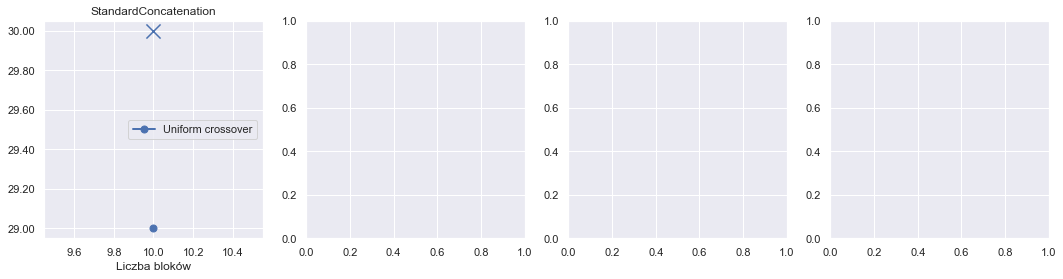

In [854]:
problem_names = {
                 'StandardConcatenation': 'StandardConcatenation',
                 'RandomStandardConcatenation': 'RandomStandardConcatenation',
                 'BimodalConcatenation': 'BimodalConcatenation',
                 'RandomBimodalConcatenation': 'RandomBimodalConcatenation'
                }


model_names = {
    'lab7zad3_onepoint': 'Onepoint crossover',
    'lab7zad3_uniform': 'Uniform crossover',
    'lab7zad3_DSM': 'DSM crossover'
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics(73, problem_names, model_names, metrics)

## ANALIZA DSM

In [873]:
iterations = [0, 10, 20]

def visualize_dsm(problem_names):
    for index, (problem_k, problem_genes) in enumerate(problem_names.items()):
        fig, ax = plt.subplots(1, len(iterations), figsize=(18, 4))
        print(problem_k)
        for iteration_id, iteration in enumerate(iterations):
            dsm = np.loadtxt(f'../Results/DSM_{problem_k}Evaluation_{problem_genes}_{iteration}_UniformCrossover.txt', delimiter=' ', dtype=str)
            print(dsm.shape)
            dsm = dsm[:, :dsm.shape[1]-1]
            dsm = dsm.astype(np.float)
            
            for i in range(dsm.shape[0]):
                dsm[i, i] = 0
            
            #ax[iteration_id].plot([1,2], [1,2])
            g = sns.heatmap(dsm, fmt='g', cmap="YlOrBr_r", ax=ax[iteration_id])
            #ax[index].imshow(dsm, cmap='hot', interpolation='nearest')
        
        plt.show()

CBinaryStandardDeceptiveConcatenation
(60, 61)
(60, 61)


C:\Users\Robert\AppData\Local\Temp\ipykernel_5212\1913993117.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dsm = dsm.astype(np.float)


(60, 61)


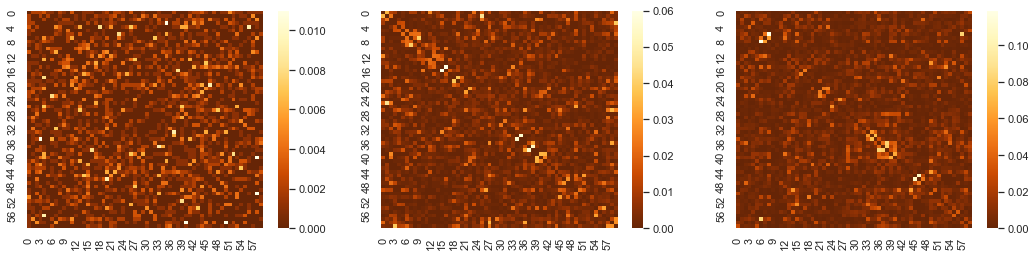

CBinaryBimodalDeceptiveConcatenation
(60, 61)
(60, 61)
(60, 61)


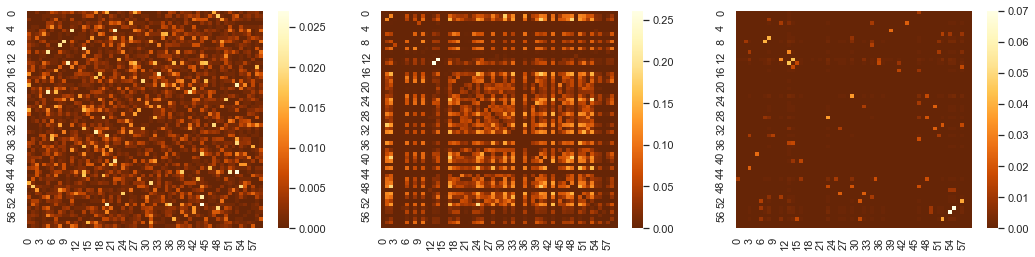

In [886]:
problem_names = {
    'CBinaryStandardDeceptiveConcatenation': 60,
    #'RandomBinaryStandardDeceptiveConcatenation':  30,
    'CBinaryBimodalDeceptiveConcatenation':  60,
    #'RandomBinaryBimodalDeceptiveConcatenation':  100
}

visualize_dsm(problem_names)

In [885]:
import numpy as np
dsm = np.loadtxt(f'../Results/DSM_CBinaryStandardDeceptiveConcatenationEvaluation_10.txt', delimiter=' ', dtype=str)

OSError: ../Results/DSM_CBinaryStandardDeceptiveConcatenationEvaluation_10.txt not found.

In [580]:
dsm = dsm[:, :dsm.shape[1]-1]

In [581]:
dsm = dsm.astype(np.float)

C:\Users\Robert\AppData\Local\Temp\ipykernel_5212\1220819363.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dsm = dsm.astype(np.float)


In [582]:
for i in range(dsm.shape[0]):
    dsm[i, i] = 0

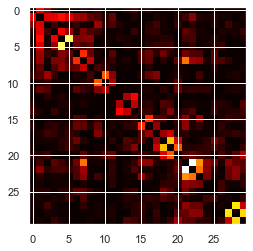

In [584]:
plt.imshow(dsm, cmap='hot', interpolation='nearest')
plt.show()

## Lab 7 zad 2

FileNotFoundError: [Errno 2] No such file or directory: '../Results/zad_72_RandomStandardConcatenation.csv'

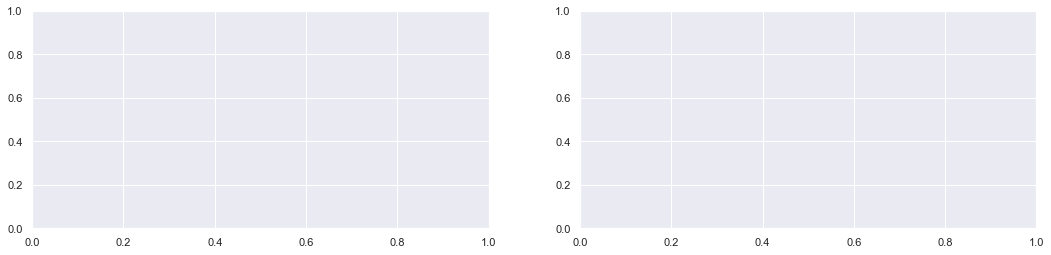

In [533]:
problem_names = {
                 'RandomStandardConcatenation': 'RandomStandardConcatenation',
                 'RandomBimodalConcatenation': 'RandomBimodalConcatenation'
                }


model_names = {
    'lab7zad2_onepoint': 'Onepoint crossover',
    'lab7zad2_uniform': 'Uniform crossover',    
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics(72, problem_names, model_names, metrics)

## Lab 7 Zad 3

In [375]:
def plot_metrics(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P']
    for metric in metrics:
        fig, ax = plt.subplots(1, len(problem_names), figsize=(18, 4))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                y = param_groups[metric].median().tolist()
                # print(x, y)
                model_name = model_names[group_name]
                ax[index].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                ax[index].set_title(problem_name)
                ax[index].legend()
                
                ax[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                ax[index].set_xlabel('Liczba bloków')
                #ax[index].set_ylabel(f'Mediana {metric}')
            
                if metric == 'bestValue':
                    optimums = load_optims(zad_id)
                    opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                    groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                    opts = groupby.maxVal

                    #print(x, opts)
                    #ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Plots/zad_{zad_id}_{problem_k}_{metric}.jpg')
        else:
            print(metric)
            plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Plots/zad_73_RandomBimodalConcatenation_bestValue.jpg'

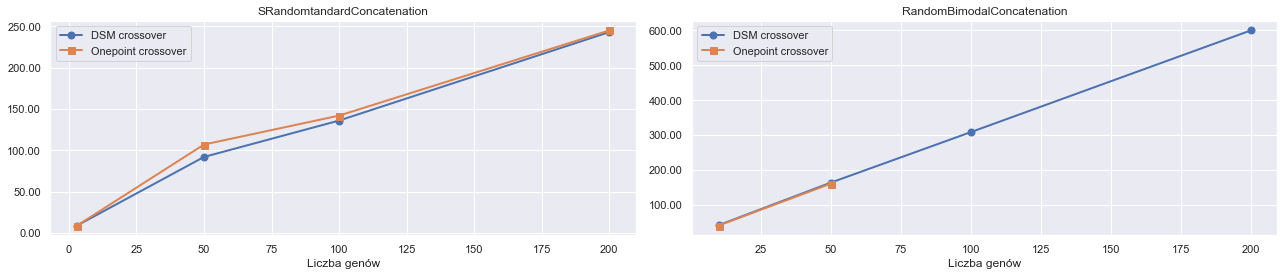

In [376]:
problem_names = {
                 'RandomStandardConcatenation': 'RandomStandardConcatenation',
                 'RandomBimodalConcatenation': 'RandomBimodalConcatenation'
                }


model_names = {
    'lab7zad3_DSM': 'DSM crossover',  
    'lab7zad3_onepoint': 'Onepoint crossover',
    'lab7zad3_uniform': 'Uniform crossover',    
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics(73, problem_names, model_names, metrics)